In [156]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

## Préparation des données

In [157]:
X, y = load_iris(return_X_y=True, as_frame=True)
X = X.copy()
y = pd.Series(y.copy())
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Mise en place des variables

In [158]:
index = X_train.index

prediction = pd.Series(index=index)
prediction[:] = y_train.mean(axis=0)

residus = pd.Series(index=index)
residus[:] = y_train[:] - prediction[:]

y_predict = pd.Series(index=X_test.index)
y_predict[:] = y_test.mean(axis=0)

residus_means = []

## mise en place du modèle

In [159]:
for iteration in range(30):
    
    model = LinearRegression().fit(X_train,residus)
    
    residus_predict = model.predict(X_train)
    residus_predict = pd.Series(residus_predict,index=index)
    
    y_predict[:] += 0.5*model.predict(X_test) #pour prédire X_test directement
    
    prediction[:] = prediction[:] + (0.5)*residus_predict[:]
    residus = y_train[:] - prediction[:]
    
    residus_means.append(np.abs(residus).mean())
    
    if np.abs(residus).mean() < 1e-6:
        break

print(r2_score(y_test, y_predict))

0.9416099732388344


## Courbe des résidus

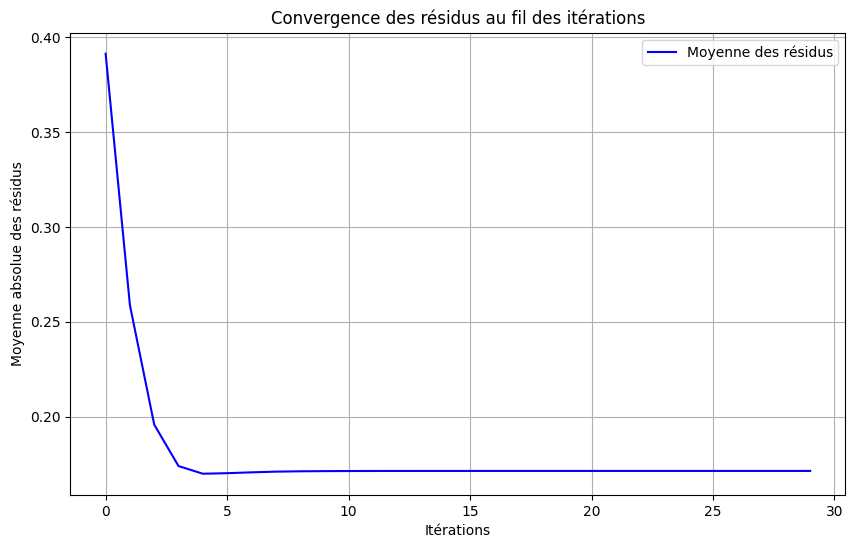

In [160]:
plt.figure(figsize=(10, 6))
plt.plot(residus_means, label='Moyenne des résidus', color='blue')
plt.xlabel('Itérations')
plt.ylabel('Moyenne absolue des résidus')
plt.title('Convergence des résidus au fil des itérations')
plt.legend()
plt.grid()
plt.show()